# Particle in a Box

In [1]:
import scipy         # Another numerical library
from scipy import integrate

import matplotlib    # Library used for plotting
import numpy as np   # Numerical library
import matplotlib.pyplot as plt # Plot commands

# Define some colors using the RGB format

CF_red = (204/255, 121/255, 167/255)
CF_vermillion = (213/255, 94/255, 0)
CF_orange = (230/255, 159/255, 0)
CF_yellow = (240/255, 228/255, 66/255)
CF_green = (0, 158/255, 115/255)
CF_sky = (86/255, 180/255, 233/255)
CF_blue = (0, 114/255, 178/255)
CF_black = (0, 0, 0)

## Particles as Waves

Particle-wave duality is a familiar concept to the 21st century folk. In one dimension, particles obey the 1D Schr&ouml;dinger equation

$$
i\hbar\partial_t\Psi(x, t) = \hat{H}\Psi(x, t)\,.
$$

For a particle in a 1D potential well, $\hat{H} = -\hbar^2/(2m) \partial_x^2 + V(x)$, where $V(x)$ is the potential energy. Inside the box, $V(x) = 0$; outside the box, $V(x) = \infty$. Within the box, the Schr&ouml;dinger equation becomes

$$
i\hbar\partial_t\Psi(x, t) = -\frac{\hbar^2}{2m}\partial_x^2\Psi(x, t)\,.
$$
Writing $\Psi(x, t) = X(x)T(t)$ yields

$$
i\hbar X(x)T'(t) = -\frac{\hbar^2}{2m}X''(x)T(t)\rightarrow 
i\frac{2m}{\hbar} \frac{T'(t)}{T(t)} = -\frac{X''(x)}{X(x)} = k^2\,.
$$
Solving for $X(x)$ and $T(t)$, we have

$$
X_k(x) = A_k \cos(k x) + B_k \sin(k x)
$$
and
$$
T_k(t) = C_k \exp\left(-ik^2\frac{\hbar}{2m}t\right)\,.
$$
Combining the two functions gives

$$
\Psi_k(x,t) = \left[A_k \cos(k x) + B_k \sin(k x)\right]\exp\left(-ik^2\frac{\hbar}{2m}t\right)
$$
Using the boundary conditions $\Psi_k(x = 0, t) = A_k \exp\left(-ik^2\frac{\hbar}{2m}t\right) = 0$, so that $A_k = 0$. For the box of width $L$, $\Psi_k(x = L, t) = 0$, leading to $kL = n\pi$. Hence

$$
\Psi_n(x,t) = A_n \sin\left(\frac{n\pi x}{L}\right)
\exp\left[-i\frac{1}{2m}\left(\frac{n\pi\hbar}{L}\right)^2t/\hbar\right]
$$

**Note**: The quantity $\frac{1}{2m}\left(\frac{n\pi\hbar}{L}\right)^2$ has the dimensions of energy, corresponding to the *allowed energy levels* inside the box. Because $n$ has to be an integer, the allowed energy levels are *discrete* or *quantized*.


## Dimensional Simplification
There are many constants in the equation of $\Psi_n$. To simplify the expression, we express $x$ in terms of $L$ so that $x / L \rightarrow x$. Also, we combine $\hbar / mL^2\rightarrow M$ to get:

$$
\Psi_n(x,t) = A_n \sin\left(n\pi x\right)
\exp\left(-i\frac{\pi^2n^2}{2M}t\right)\,.
$$

Because $|\Psi|^2$ corresponds to the probability, integrating it over the size of the box should give 1, giving us the value of the normalization constant $A_n$:

$$
\Psi_n(x,t) = \sqrt{2} \sin\left(n\pi x\right)
\exp\left(-i\frac{\pi^2n^2}{2M}t\right)\,.
$$

Now that we have the modes, we can write down the total wavefunction as a linear combination of the modes:

$$
\Psi(x,t) = \sum_n c_n \sqrt{2} \sin\left(n\pi x\right)
\exp\left(-i\frac{\pi^2n^2}{2M}t\right)\,,
$$
where $c_n$ are the coefficients.

### Question 1

Let $M$ = 1. At $t = 0$, $\Psi(x) = \Psi_n(x)$. Show that $|\Psi_n(x,t)|^2$ remains unchanged as $t$ changes.

In [2]:
M = 1
n_harm = 20

def mode(x, t, n):
    exp_power = -1j * ((np.pi**2 * n**2) / (2 * M)) * t
    return np.sqrt(2) * np.sin(n * np.pi * x) * np.exp(exp_power)

def initial_state(x):
    return mode(x, 0, 1)

def C_n(n, t):
    func = lambda x: initial_state(x) * mode(x, t, n)
    integral = integrate.quad(func, 0, 1, complex_func=True)
    return integral[0]

def term(x, t, n):
    return (C_n(n, t)) * (mode(x, t, n))

def wavefunction(x, t):
    return np.sum([term(x, t, n) for n in range(1, n_harm + 1)])

I define the functions that I use later to model the particle in a box. First, I define the `mode` function that calculates $\Psi_n(x, t)$. Using this function, I represent the initial state of the particle as $\Psi_1(x, 0)$.

Then, I have a function `C_n` that calculates the coefficients by integrating the multiplication of the `initial_state` and `mode` functions from 0 to 1. An important part here is setting the parameter `complex_func` to `True` to get the full complex value of the integral. 

Finally, I can define the `term` function that simply multiplies the `mode` function with the coefficient. I can then use this function to represent the total `wavefunction` $\Psi(x, t)$ by summing over all terms. I consider the first 20 harmonics to get a good approximation of the wavefunction.

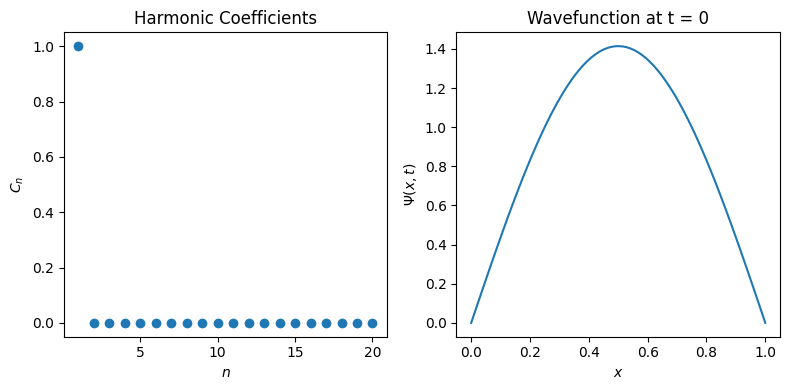

In [9]:
nPts = 100
t = 0

C_ns = [C_n(n, t) for n in range(1, n_harm + 1)]
xs = np.linspace(0, 1, nPts)
res = [wavefunction(x, t) for x in xs]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.scatter(range(1, n_harm + 1), np.abs(C_ns)) 
ax1.set(xlabel="$n$", ylabel="$C_n$", title = "Harmonic Coefficients")
ax2.plot(xs, np.abs(res))
ax2.set(xlabel="$x$", ylabel="$\Psi(x, t)$", title = f"Wavefunction at t = {t}")
plt.tight_layout()

Here, I plot the harmonic coeffiecients and the wavefunction like we did in class for the strings. I tried different values of $t$ to make sure that my implementation is correct. I expect the wavefunction to remain unchanged as $t$ changes. 

Initally, there seemed to be a change in the wavefunction as $t$ changes. However, I realized that this was because the plots only showed the real part of the wavefunction. When I plot the absolute value of the wavefunction, I see that it does remains unchanged as $t$ changes.

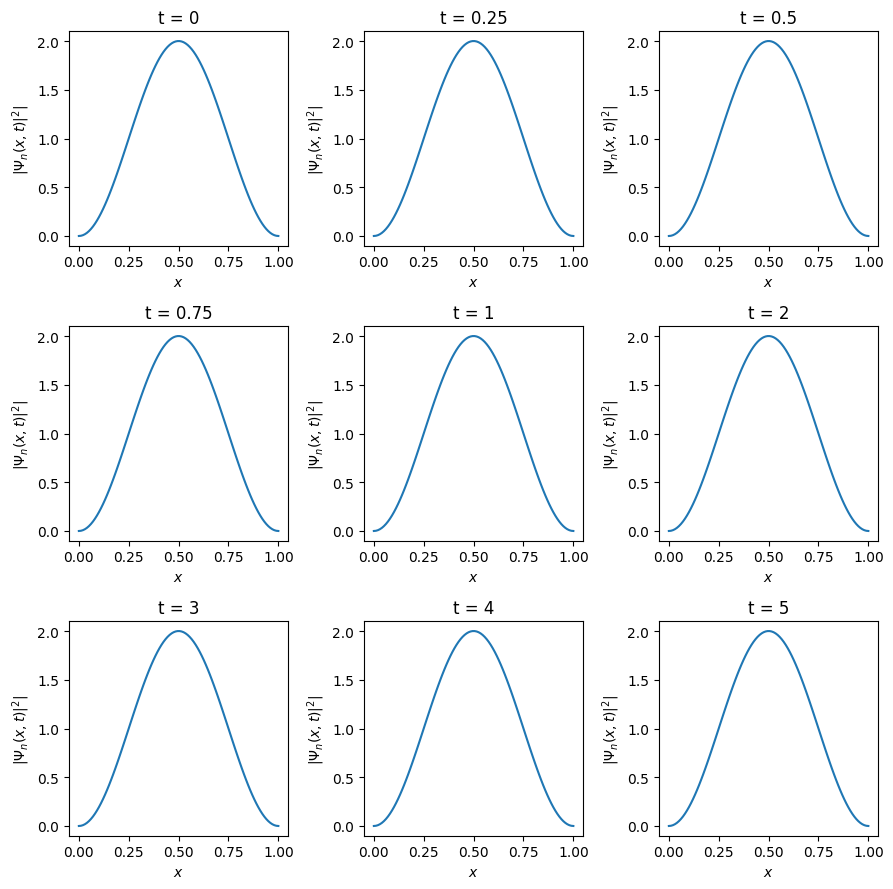

In [4]:
fig, axs = plt.subplots(3, 3, figsize=(9, 9))

nPts = 100
xs = np.linspace(0, 1, nPts)

ts = [0, 0.25, 0.5, 0.75, 1, 2, 3, 4, 5]
for i, t in enumerate(ts):
    ax = axs[int(i / 3), i % 3]
    res = [wavefunction(x, t) for x in xs]
    res = np.abs(res)**2
    ax.plot(xs, res)
    ax.set(xlabel = "$x$", ylabel = "$|\Psi_n(x,t)|^2|$", title = f"t = {t}")

plt.tight_layout()

Here is a plot of $|\Psi_n(x,t)|^2$ for different values of $t$. This shows that the probability distribution remains unchanged as $t$ changes, which is what we expect.

### Question 2
At $t= 0$, let $\Psi(x) = \frac{1}{\sigma\sqrt{2\pi}}\exp\left[-\frac{(x - 1/2)^2}{2\sigma^2} \right] - \frac{1}{\sigma\sqrt{2\pi}}\exp\left[-\frac{(0 - 1/2)^2}{2\sigma^2} \right]$. Keep $\sigma$ smaller than 1 (plot it to make sure the entire wavefunction is INSIDE the box).

Set $M = 1$ and calculate $c_n$'s. Show how $|\Psi_n(x,t)|^2$ changes in time. 

In [27]:
M = 1
n_harm = 100

sigma = 1e3
def initial_state(x):
    factor = 1 / (sigma * np.sqrt(2 * np.pi))
    exp_power = lambda x: -(x - 0.5)**2/(2 * sigma**2)
    return factor * np.exp(exp_power(x)) - factor * np.exp(exp_power(0))
    # return factor * np.exp(-(x - 0.5)**2 / (2 * sigma**2)) - factor * np.exp(-(0-1/2)**2 / (2 * sigma**2))

Here, only the `initial_state` function needs to be redifined based on the given expression. I also increased the number of harmonics from $20$ to $100$ to get a better view of the wavefunction.

TODO: from here onwards

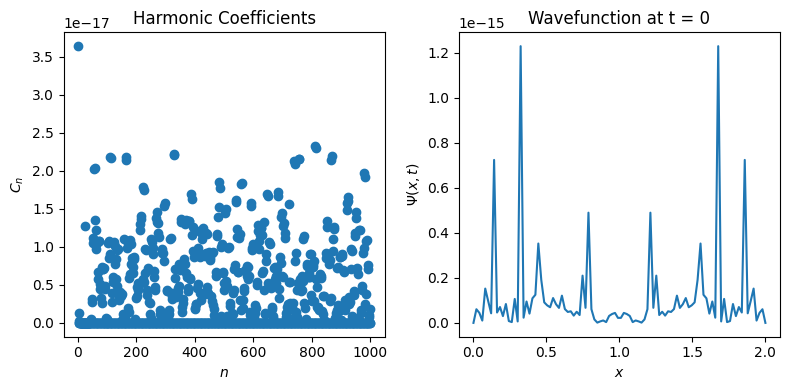

In [29]:
nPts = 100
t = 0

C_ns = [C_n(n, t) for n in range(1, n_harm + 1)]
xs = np.linspace(0, 2, nPts)
res = [wavefunction(x, t) for x in xs]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.scatter(range(1, n_harm + 1), np.abs(C_ns)) 
ax1.set(xlabel="$n$", ylabel="$C_n$", title = "Harmonic Coefficients")
ax2.plot(xs, np.abs(res))
ax2.set(xlabel="$x$", ylabel="$\Psi(x, t)$", title = f"Wavefunction at t = {t}")
plt.tight_layout()

In [11]:
max_t = 100
ts = list(range(0, max_t + 1))

nPts = 100
xs = np.linspace(0, 1, nPts)
n = 1

unchanged = []
for x in xs:
    res = [np.abs(term(x, t, n))**2 for t in ts]
    is_unchanged = np.isclose(res, res[0], 0, atol=1e10)
    unchanged.append(is_unchanged)

np.any(unchanged == False)

False

### Question 3

Play with $M$. How does the system's evolution with time change with $M$?